# PyTorch and Computer Vision

We will be looking at Computer Vision in this chapter

In [131]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.4.1+cu121
0.19.1+cu121


The data we are using is from Torch Vision Datasets.  It is an MNIST fashion dataset

In [132]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
    )

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
    )

In [133]:
len(test_data),len(train_data)

(10000, 60000)

In [134]:
image,label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [135]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [136]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [137]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

# Checking shapes of imported dataset

In [138]:
print(f'Image Shape: {image.shape} --> colour channels, height, width]')
print(f'Image label: {class_names[label]}')


Image Shape: torch.Size([1, 28, 28]) --> colour channels, height, width]
Image label: Ankle boot


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

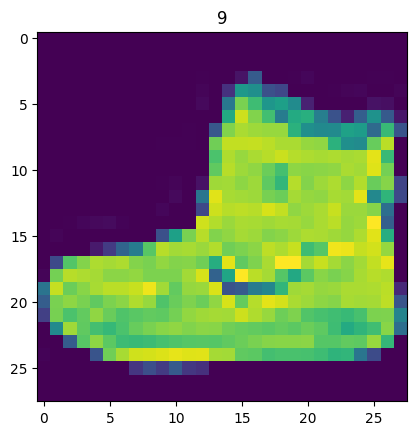

In [139]:
import matplotlib.pyplot as plt

image, label = train_data[0]

print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())

plt.title(label)


(-0.5, 27.5, 27.5, -0.5)

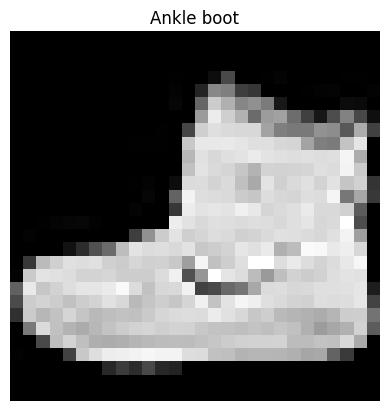

In [140]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

Plot more images but at random

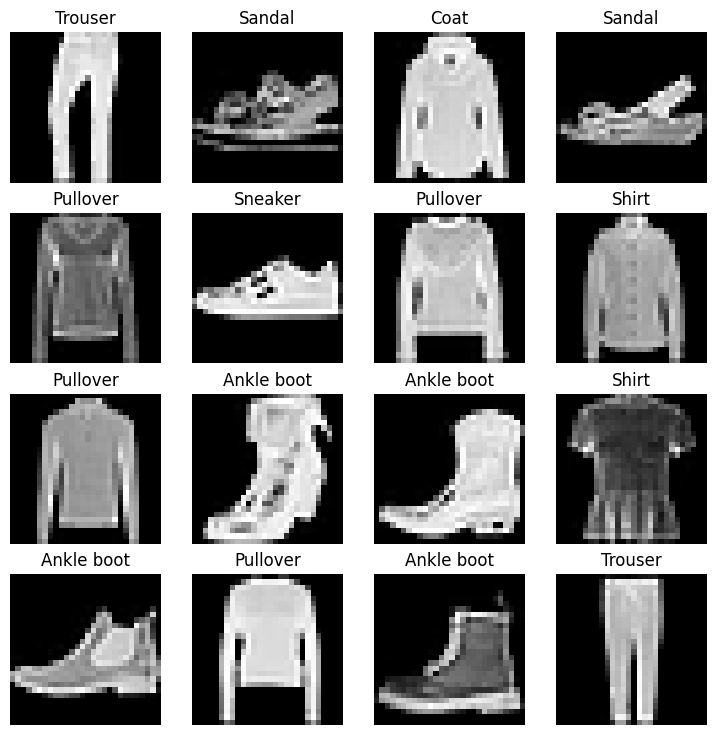

In [141]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows * cols+1):
  random_idx = torch.randint(0,len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

Time stamp 15hrs 1min

In [142]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [143]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7ecd2ada7df0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ecd2ada5720>)

In [144]:
print(f'Dataloaders: {train_dataloader,test_dataloader}')
print(f'Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7ecd2ada7df0>, <torch.utils.data.dataloader.DataLoader object at 0x7ecd2ada5720>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [145]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


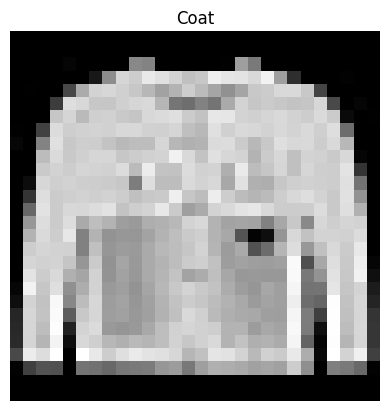

In [146]:
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()

img,label = train_features_batch[random_idx],train_labels_batch[random_idx]

plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[(label)])
plt.axis(False)
print(f'Image Size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

## Model 0 : Building a baseline model

In [147]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape

output = flatten_model(x)

print(f'Shape before{x.shape}')
print(f'After flatten {output.shape}')

Shape beforetorch.Size([1, 28, 28])
After flatten torch.Size([1, 784])


In [148]:
28 * 28


784

In [149]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
              input_shape: int,
              hidden_units: int,
              output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [150]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units = 10,
    output_shape=len(class_names)
).to("cpu")

model_0



FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [151]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [152]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

Setting up Loss function and Optimizer

In [153]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/abinghamwalker/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
      f.write(request.content)



helper_functions.py already exists, skipping download


In [154]:
from helper_functions import accuracy_fn

#Set up Loss Function and Optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [155]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):

  total_time = end - start
  print(f' Train time on {device}: {total_time: .3f} seconds.')
  return total_time

In [156]:
start_time = timer()
# some code

end_time = timer()
print_train_time(start=start_time,end=end_time, device="cpu")

 Train time on cpu:  0.000 seconds.


5.7778999689617194e-05

In [157]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n------")

  train_loss = 0

  for batch , (X,  y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.')

  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred,y_test)

      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

    print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}')

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                              end= train_time_end_on_cpu,
                                              device = str(next(model_0.parameters()).device))








  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.5904 | Test loss: 0.5095 | Test acc: 82.0387
Epoch: 1 
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4763 | Test loss: 0.4799 | Test acc: 83.1969
Epoch: 2 
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4550 | Test loss: 0.4766 | Test acc: 83.4265
 Train time on cpu:  34.286 seconds.


In [158]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """ Returns a dict returning results of model predicting on data loader"""

  loss, acc = 0,0
  model.eval()

  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      y_pred = model(X)
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name" : model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

model_o_results= eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_o_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [159]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [160]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [161]:
from torch import nn

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
              input_shape: int,
              hidden_units: int,
              output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x):
    return self.layer_stack(x)


In [162]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [163]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [164]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [165]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculuate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [166]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
----------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
----------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%

 Train time on cpu:  34.295 seconds.


In [167]:
total_train_time_model_0


34.28628526200009

Video time stamp 17hrs 5mins

In [168]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """ Returns a dict returning results of model predicting on data loader"""

  loss, acc = 0,0
  model.eval()

  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name" : model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


In [169]:
model_o_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [170]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

Time stamp 17hrs 13mins

**We will now build a Convutional Neural Network**

In [171]:
import torch
from torch import nn

# Create the CNN network

class FashionMNISTModelV2(nn.Module):
  """Model architecture that replicates the TinyVGG
  model from CNN explainer website"""

  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):

    x= self.conv_block_1(x)
    # print(f'Output shape of conv_block_1 : {x.shape}')
    x = self.conv_block_2(x)
    # print(f'Output shape of conv_block_2: {x.shape}')
    x = self.classifier(x)
    # print(f'Output shape of classifier: {x.shape}')
    return x





In [172]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              output_shape=len(class_names),
                              hidden_units=10).to(device)

In [173]:
rand_image_tensor = torch.randn(size=(1,28,28))
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

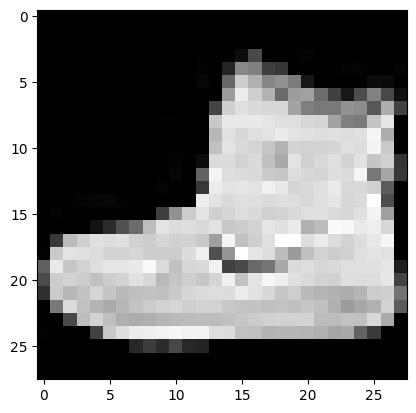

In [174]:
plt.imshow(image.squeeze(), cmap="gray")

### Stepping through `nn.Conv2d`

In [175]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3 , 64 , 64))
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test image:\n {test_image}')

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [176]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0
                       )

conv_output = conv_layer(test_image.unsqueeze(dim=0))
conv_output.shape

torch.Size([1, 10, 62, 62])

## Stepping throgh `nn.maxpool2d`

In [177]:
print(f'Test image original shape: {test_image.shape}')
print(f'Test image unsqueezed shape: {test_image.unsqueeze(dim=0).shape}')

maxpool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))

print(f'Shape after going through conv_layer(): {test_image_through_conv.shape}')

test_image_through_conv_and_maxpool = maxpool_layer(test_image_through_conv)

print(f'Shape after going through conv layer and maxpool_layer(): {test_image_through_conv_and_maxpool.shape}')

Test image original shape: torch.Size([3, 64, 64])
Test image unsqueezed shape: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv layer and maxpool_layer(): torch.Size([1, 10, 31, 31])


In [178]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1,1,2,2))
random_tensor

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

In [179]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)
print(f'\nRandom tensor:\n{random_tensor}')
print(f'\nRandom tensor shape:\n{random_tensor.shape}')
max_pool_tensor = max_pool_layer(random_tensor)

print(f'\nMax pool tensor:\n {max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random tensor shape:
torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


## Passing information through this model

Time stamp 18hrs 26mins

## Set up a loss function and optimzer

In [180]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [181]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 0.59518 | Train acc: 78.38%
Test loss: 0.39500 | Test acc: 85.99%

Epoch: 1
----------
Train loss: 0.36536 | Train acc: 86.90%
Test loss: 0.35244 | Test acc: 86.91%

Epoch: 2
----------
Train loss: 0.32588 | Train acc: 88.13%
Test loss: 0.32719 | Test acc: 88.07%

 Train time on cpu:  172.820 seconds.


In [182]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [184]:
import pandas as pd

compare_results = pd.DataFrame([model_o_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


# Add training time to the results comparison

In [186]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,34.286285
1,FashionMNISTModelV1,0.685001,75.019968,34.294997
2,FashionMNISTModelV2,0.327190,88.069089,172.820332


Text(0, 0.5, 'model')

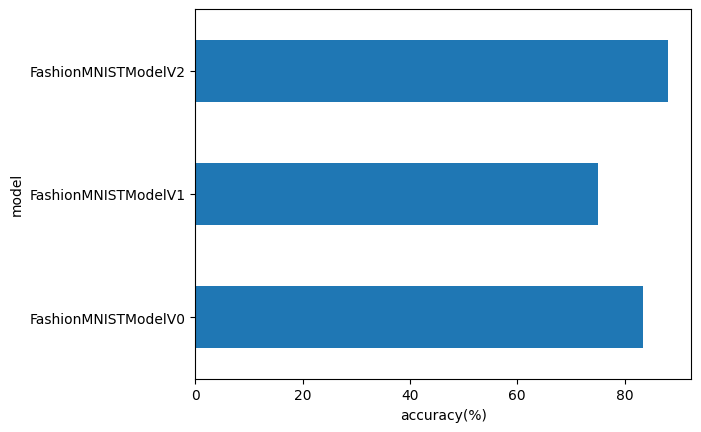

In [190]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

In [191]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     devivce: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0).to(device)

      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())

  pred_probs = torch.stack(pred_probs)
  return pred_probs



In [228]:
import random
# random.seed(42)


test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

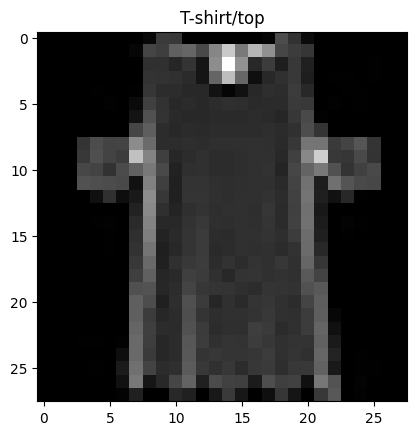

In [229]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [230]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

tensor([[2.5718e-01, 1.4893e-04, 6.0512e-04, 3.2552e-02, 1.6298e-03, 7.6821e-06,
         7.0745e-01, 1.2480e-05, 4.0998e-04, 4.0857e-06],
        [7.0113e-04, 6.1182e-06, 5.3528e-01, 6.3364e-04, 4.5956e-01, 1.4718e-07,
         3.7366e-03, 9.7382e-07, 7.7942e-05, 2.5575e-06]])

In [231]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 2, 7, 8, 5, 8, 9, 8, 5])

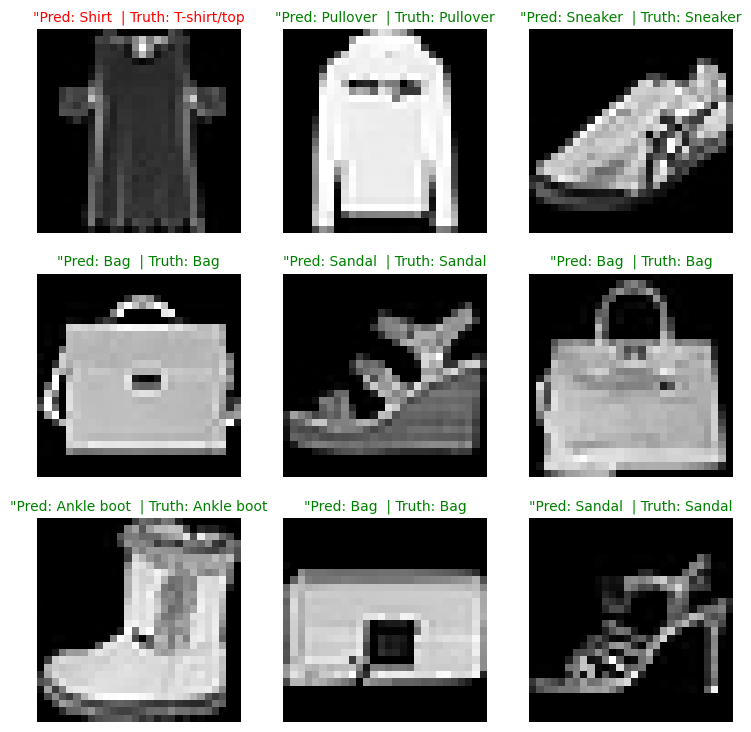

In [232]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f'"Pred: {pred_label}  | Truth: {truth_label}'
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="green")
  else:
    plt.title(title_text,fontsize=10,c="red")


  plt.axis(False)

## Confusion Matrix

In [239]:
from tqdm.auto import tqdm

y_preds = []

model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictiions..."):
    X, y = X.to(device), y.to(device)
    y_logits = model_2(X)
    y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

  y_pred_tensor = torch.cat(y_preds)
  y_pred_tensor[:10]

Making predictiions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [240]:
len(y_pred_tensor)

10000

In [244]:
try:
  !pip install -q torchmetrics -U
  import torchmetrics
  print(f'torchmetrics version: {torchmetrics.__version__}')
except:
  print('torchmetrics not installed')
  pass


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 5.4 MB/s eta 0:00:00
torchmetrics version: 1.4.2


Time stamp 19hrs 17mins

In [246]:
import mlxtend

mlxtend.__version__

'0.23.1'

In [247]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


In [256]:
confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

confmat_tensor

tensor([[628,   5,  44,  79,  12,   1, 224,   0,   7,   0],
        [  8, 895,   7,  68,  13,   0,   5,   0,   3,   1],
        [  7,   1, 810,  13,  95,   0,  69,   0,   5,   0],
        [ 25,  13,  25, 861,  36,   0,  34,   0,   4,   2],
        [  5,   6, 117,  50, 712,   0, 106,   0,   4,   0],
        [  6,   0,   9,  11,   0, 840,   4,  44,  66,  20],
        [ 69,   7, 123,  64,  98,   0, 626,   0,  13,   0],
        [  1,   1,   0,   1,   0,  33,   0, 877,  18,  69],
        [  8,   2,  23,  17,   6,   7,  29,   7, 900,   1],
        [  1,   0,   1,   2,   0,  20,   4,  71,  11, 890]])

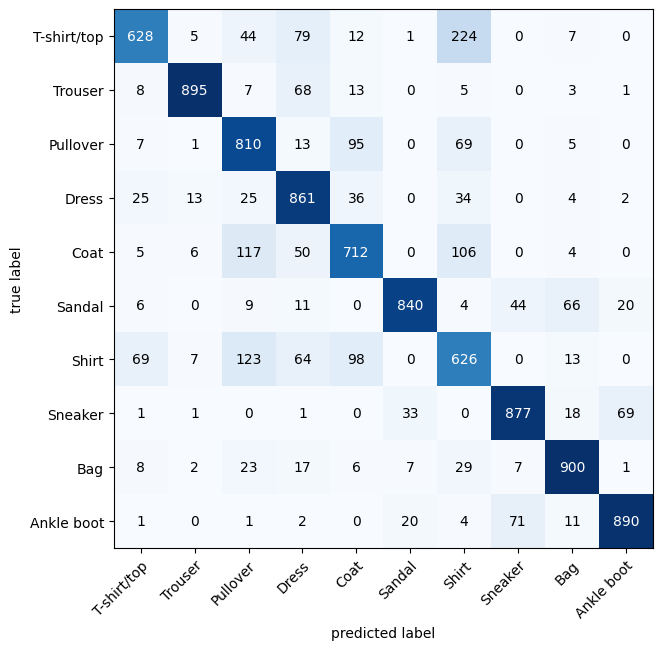

In [257]:
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10,7),
                                )

##Exporting a model to a file

In [258]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/03_pytorch_computer_vision_model_2.pth')

In [259]:
print("Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : {MODEL_SAVE_PATH}


In [260]:
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                output_shape=len(class_names),
                                hidden_units=10).to(device)

In [261]:
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

<ipython-input-261-e05cda32f6a2>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [262]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [265]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                   data_loader=test_dataloader,
                                   loss_fn=loss_fn,
                                   accuracy_fn=accuracy_fn,
                                   device=device
                                   )

  0%|          | 0/313 [00:00<?, ?it/s]

In [266]:
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [268]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
                           torch.tensor(loaded_model_2_results["model_loss"]),
                           atol=1e-08)

tensor(True)